# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [26]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

### Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [27]:
# your code here
bikes = pd.read_csv('citibike.csv')
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [28]:
# Your code here
for c in bikes.columns:
    print(c, bikes[c].isna().sum())

bikes = bikes.dropna()
print()

for c in bikes.columns:
    print(c, bikes[c].isna().sum())

trips 0
precipitation 0
snow_depth 0
snowfall 0
max_temperature 0
min_temperature 0
average_wind_speed 3
year 0
season 0
month 0
holiday 0
stations_in_service 0
weekday 0
weekday_non_holiday 0

trips 0
precipitation 0
snow_depth 0
snowfall 0
max_temperature 0
min_temperature 0
average_wind_speed 0
year 0
season 0
month 0
holiday 0
stations_in_service 0
weekday 0
weekday_non_holiday 0


c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [29]:
# Your code here
weekend = bikes[bikes['weekday'] == False]
weekday = bikes[bikes['weekday'] == True]

In [30]:
weekend.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
9,37201,0.000000,0.0,0.0,82.94,69.98,4.92126,2013,summer,8,False,329,False,False
10,33060,0.000000,0.0,0.0,80.96,64.94,2.46063,2013,summer,8,False,329,False,False
16,37285,0.000000,0.0,0.0,84.02,64.04,2.01324,2013,summer,8,False,329,False,False


In [31]:
weekday.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True


d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

In [32]:
# Your code here

fig = px.box(bikes, x="season", y="trips")
fig.show()

fig = px.box(bikes, x="weekday", y="trips")
fig.show()

--> Your answer here  
Seasons: Winter is the smallest trips. Summmer and fall has the larger trips, but summer is denser than fall, which means more trips in summer.
Weekday: Weekday has more trips than weekend, but the difference is not significant. 

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [33]:
import statsmodels.formula.api as smf

In [34]:
# Your code here
x =  weekday['season'].astype('category').cat.codes
x = sm.add_constant(x)
x = x.rename(columns={0:'season'})
y = weekday['trips']
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           5.89e-38
Time:                        23:01:01   Log-Likelihood:                -6503.4
No. Observations:                 608   AIC:                         1.301e+04
Df Residuals:                     606   BIC:                         1.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.38e+04    675.885     50.016      0.000    3.25e+04    3.51e+04
season     -5267.0329    381.137    -13.819      0.000   -6015.542   -4518.524
==============================================================================
Omnibus:                       31.428   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.168
Skew:                          -0.178   Prob(JB):                     0.000508
Kurtosis:                       2.313   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

--> *Your answer here*
Two coefficients:
1. const. The constant in the linear function, eg. Y-intercept.
2. seasons. The input X, eg. season data

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

In [35]:
print(weekday['season'].astype('category'))

0      summer
1      summer
4      summer
5      summer
6      summer
        ...  
845      fall
846      fall
847      fall
848      fall
851      fall
Name: season, Length: 608, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']


In [36]:
weekday.iloc[1]

trips                    35792
precipitation              0.0
snow_depth                 0.0
snowfall                   0.0
max_temperature          82.94
min_temperature          66.92
average_wind_speed     4.47387
year                      2013
season                  summer
month                        8
holiday                  False
stations_in_service        329
weekday                   True
weekday_non_holiday       True
Name: 1, dtype: object

--> *Your answer here*  
y = -5267.0329 * season + 33800  (fall=0, spring=1, summer=2, winter=3)  

predict trips: -5267.0329 * 2 + 33800 = 23265.9342  
true trips: 35792

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [37]:
# Your code here
x =  weekend['season'].astype('category').cat.codes
x = sm.add_constant(x)
x = x.rename(columns={0:'season'})
y = weekend['trips']
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     53.13
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           4.54e-12
Time:                        23:01:02   Log-Likelihood:                -2545.8
No. Observations:                 241   AIC:                             5096.
Df Residuals:                     239   BIC:                             5103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.673e+04    945.822     28.265      0.000    2.49e+04    2.86e+04
season     -3926.3601    538.671     -7.289      0.000   -4987.510   -2865.211
==============================================================================
Omnibus:                       22.647   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.793
Skew:                          -0.102   Prob(JB):                       0.0203
Kurtosis:                       2.143   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(weekend['season'].astype('category'))

2      summer
3      summer
9      summer
10     summer
16     summer
        ...  
829      fall
835      fall
836      fall
842      fall
843      fall
Name: season, Length: 241, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']


In [39]:
weekend.iloc[1]

trips                    35253
precipitation              0.0
snow_depth                 0.0
snowfall                   0.0
max_temperature          80.06
min_temperature          66.02
average_wind_speed     5.14495
year                      2013
season                  summer
month                        8
holiday                  False
stations_in_service        329
weekday                  False
weekday_non_holiday      False
Name: 3, dtype: object

--> *Your answer here*  
Two coefficients:  
1. const. The constant in the linear function, eg. Y-intercept.  
2. seasons. The input X, eg. season data  

y = -3926.3601 * season + 26730  (fall=0, spring=1, summer=2, winter=3)  

predict trips: -3926.3601 * 2 + 26730 = 18877.2798  
true trips: 35253

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [40]:
# Your code here
x =  weekday[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']]
x = sm.add_constant(x)

y = weekday['trips']
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          3.70e-187
Time:                        23:01:02   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5252.4304   1205.888     -4.356      0.000   -7620.697   -2884.164
snow_depth       -280.4113     95.684     -2.931      0.004    -468.328     -92.495
snowfall          -71.3863    291.702     -0.245      0.807    -644.265     501.492
min_temperature   -11.1556     54.784     -0.204      0.839    -118.748      96.437
max_temperature   460.9413     50.620      9.106      0.000     361.527     560.356
precipitation   -8226.5494    658.545    -12.492      0.000   -9519.878   -6933.221
month             661.0439     82.648      7.998      0.000     498.730     823.357
==============================================================================
Omnibus:                       33.157   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.598
Skew:                           0.205   Prob(JB):                     2.12e-20
Kurtosis:                       4.846   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

--> *Your answer here*  
y = -280.4113 * snow_depth - 71.3863 * snowfall - 11.1556 * min_temperature + 460.9413 * max_temperature - 8226.5494 * precipitation + 661.0439 * month - 5252.4304

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [41]:
# Your code here
x =  weekday[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month', 'average_wind_speed', 'stations_in_service']]
x = sm.add_constant(x)

y = weekday['trips']
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     415.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.35e-238
Time:                        23:01:02   Log-Likelihood:                -6015.7
No. Observations:                 608   AIC:                         1.205e+04
Df Residuals:                     599   BIC:                         1.209e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.811e+04   2077.652    -13.532      0.000   -3.22e+04    -2.4e+04
snow_depth           -345.3557     78.207     -4.416      0.000    -498.949    -191.762
snowfall              -48.6344    238.803     -0.204      0.839    -517.627     420.358
min_temperature        31.8569     44.708      0.713      0.476     -55.947     119.661
max_temperature       394.0083     41.601      9.471      0.000     312.307     475.709
precipitation       -7924.4828    542.548    -14.606      0.000   -8990.010   -6858.955
month                 280.8469     70.685      3.973      0.000     142.026     419.668
average_wind_speed   -327.0220    108.771     -3.007      0.003    -540.641    -113.403
stations_in_service    85.3883      4.942     17.278      0.000      75.682      95.094
==============================================================================
Omnibus:                      102.394   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.969
Skew:                          -0.808   Prob(JB):                     3.63e-67
Kurtosis:                       6.077   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--> *Your answer here*  
New features: average_wind_speed and stations_in_service  
R-squared:	0.768 -> 0.847  
The new model is more accuracy.  

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

--> *Your answer here*  
Increased ridership: min_temperature, max_temperature, month, stations_in_service  
Decreased ridership: snow_depth, snowfall, precipitation, average_wind_speed  

e) Which predictors are statistically significant (95% confidence level)? [2pt]

--> *Your answer here*  
snow_depth, max_temperature, precipitation, month, average_wind_speed, stations_in_service    

## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. [2pt]


In [42]:
# your code here
x =  weekday[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']]
x.corr()

,snow_depth,snowfall,min_temperature,max_temperature,precipitation,month
snow_depth,1.000000,0.261811,-0.493187,-0.475653,0.022949,-0.439442
snowfall,0.261811,1.000000,-0.237841,-0.232368,0.237246,-0.215126
min_temperature,-0.493187,-0.237841,1.000000,0.968400,0.013444,0.381236
max_temperature,-0.475653,-0.232368,0.968400,1.000000,-0.011895,0.329866
precipitation,0.022949,0.237246,0.013444,-0.011895,1.000000,0.003059
month,-0.439442,-0.215126,0.381236,0.329866,0.003059,1.000000


--> Your answer here  
max_temperature and min_temperature are highly correlated.

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

In [43]:
# your code here

--> *Your answer here*  
max_temperature and min_temperature are highly correlated.  
In general, max_temperature >= min_temperature. And in reailty, temperature difference in a day is not too high. 

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [44]:
# Your code here
# Your code here
x =  weekday[['snow_depth', 'snowfall', 'max_temperature', 'precipitation', 'month']]
x = sm.add_constant(x)

y = weekday['trips']
mod = sm.OLS(y, x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     399.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.80e-188
Time:                        23:01:02   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     602   BIC:                         1.232e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5144.3465   1081.924     -4.755      0.000   -7269.151   -3019.542
snow_depth       -279.1800     95.417     -2.926      0.004    -466.571     -91.789
snowfall          -69.5130    291.324     -0.239      0.811    -641.649     502.623
max_temperature   451.0544     14.304     31.533      0.000     422.962     479.147
precipitation   -8241.0373    654.169    -12.598      0.000   -9525.767   -6956.307
month             657.2826     80.493      8.166      0.000     499.201     815.364
==============================================================================
Omnibus:                       33.268   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.520
Skew:                           0.208   Prob(JB):                     2.21e-20
Kurtosis:                       4.844   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

In [45]:
# Your code here
# You can add more cells if you need them

--> *Your answer here*  
max_temperature: 460.9413 -> 451.0544.   
It's almost same as 3.a.   
The max_temperature is positive correlation with trips.

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

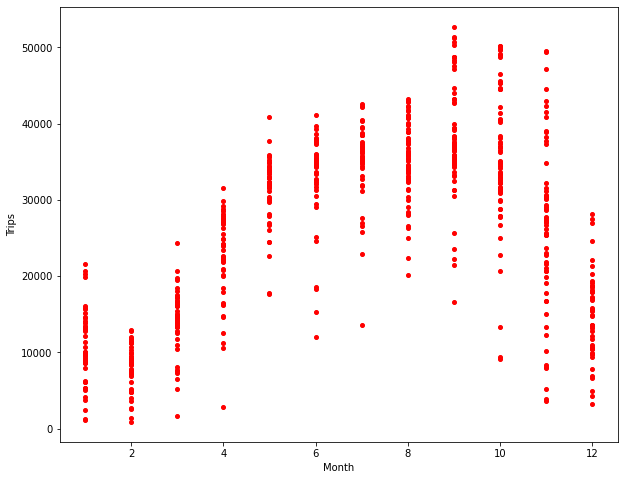

In [46]:
# Your code here
y = weekday['trips']
x = weekday['month']
plt.figure(figsize=(10,8))
plt.plot(x,y,'ro',markersize=4)
plt.xlabel('Month')
plt.ylabel('Trips')
plt.show()

--> *Your answer here*  
Linear relationship is not a good way

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

In [76]:
# Your code here
# You can add more cells if you need them
from sklearn.metrics import r2_score

def poly_reg(x, y, data, order):
    plt.figure(figsize=(15,5*order))
    for i in range(order):
        if i == 0:
            func = 'trips ~ ' + x
        else:
            func += '+I({}**{})'.format(x, i+1)
        plt.subplot(order, 1, i+1)
        # print(func)
        r2 = smf.ols(formula=func, data=data).fit().rsquared
        sns.regplot(x=x, y=y, data=data, order=i+1)
        plt.title('R2 = %.4f' % r2)

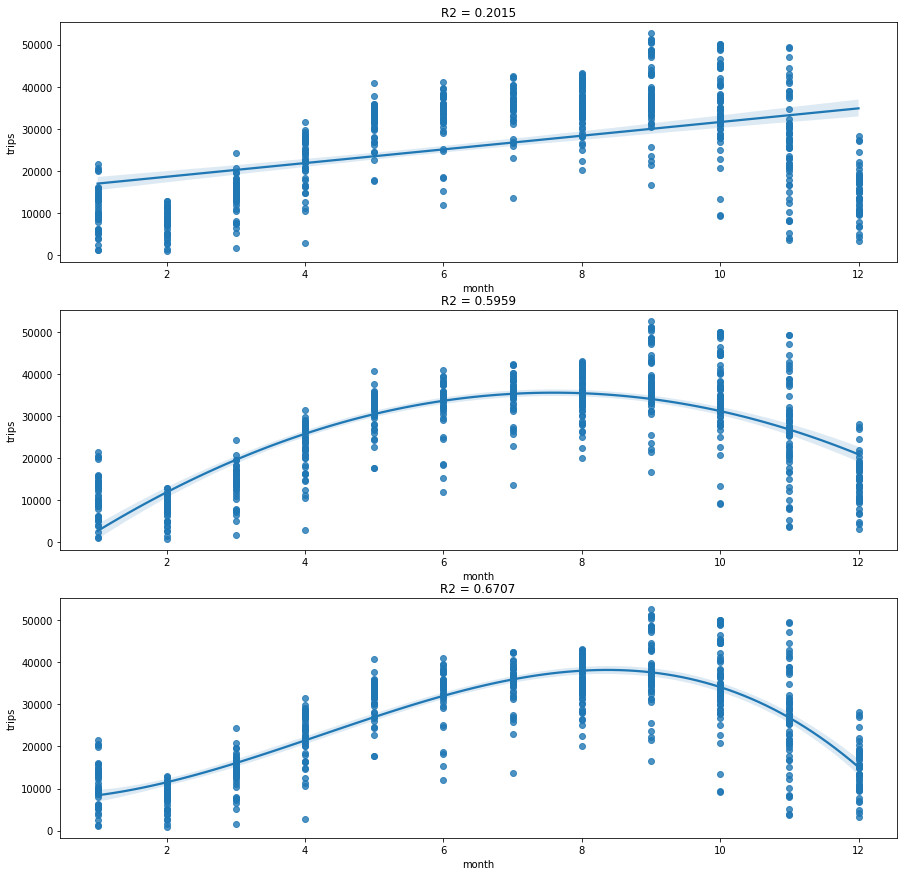

In [77]:
poly_reg('month', 'trips', weekday, 3)

--> *Your answer here*  
Order=3 is the best. Because the curve is corresponding to the data, and R2 is the biggest.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


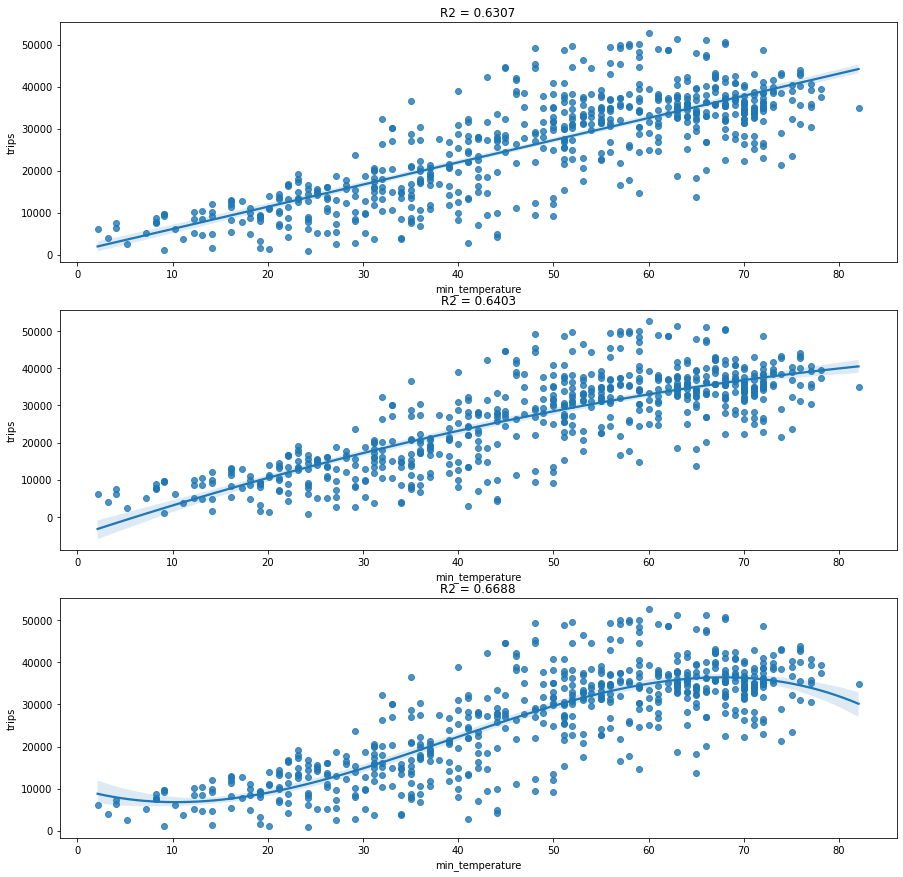

In [84]:
# Your code here
# You can add more cells if you need them
poly_reg('min_temperature', 'trips', weekday, 3)
# Order=3 is the best, R2=0.6688

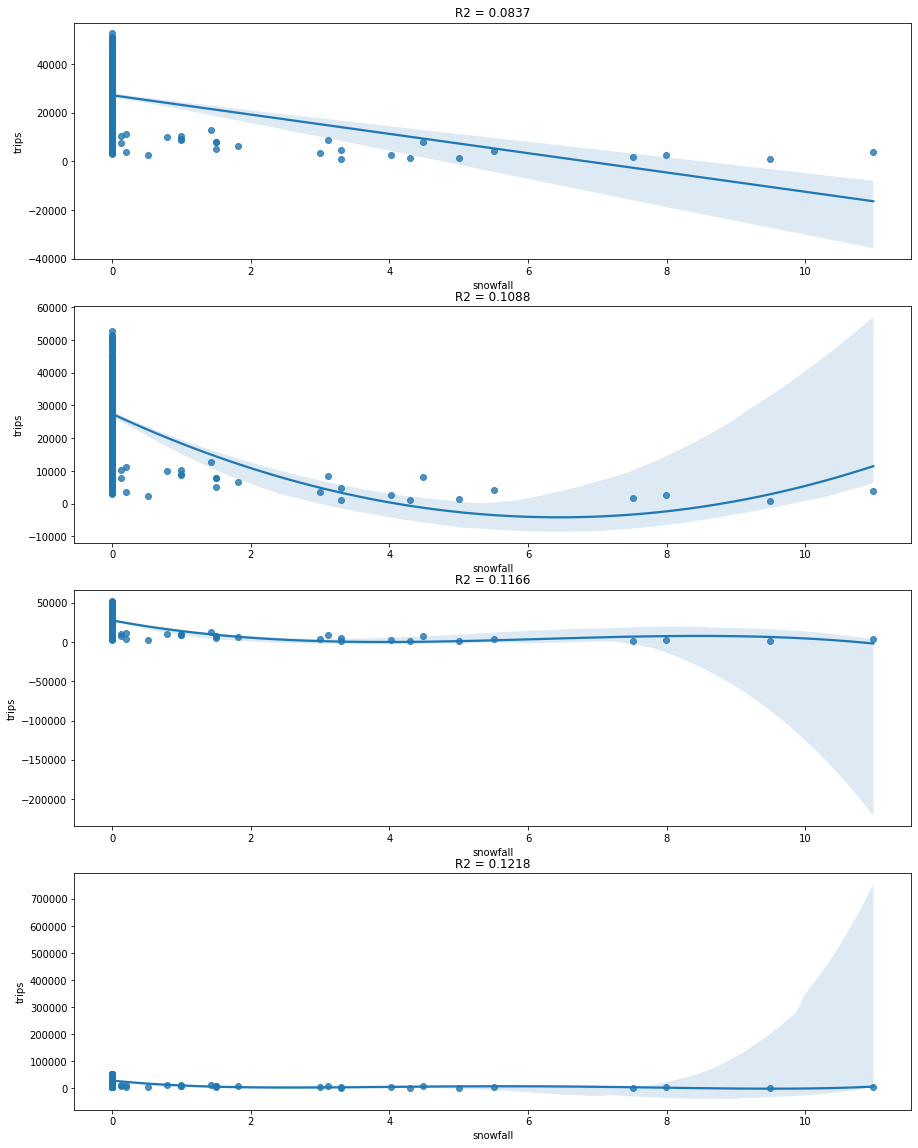

In [86]:
poly_reg('snowfall', 'trips', weekday, 4)
# order=4 is the best, R2= 0.1218, but R2 is small, means linear regression model is not good 

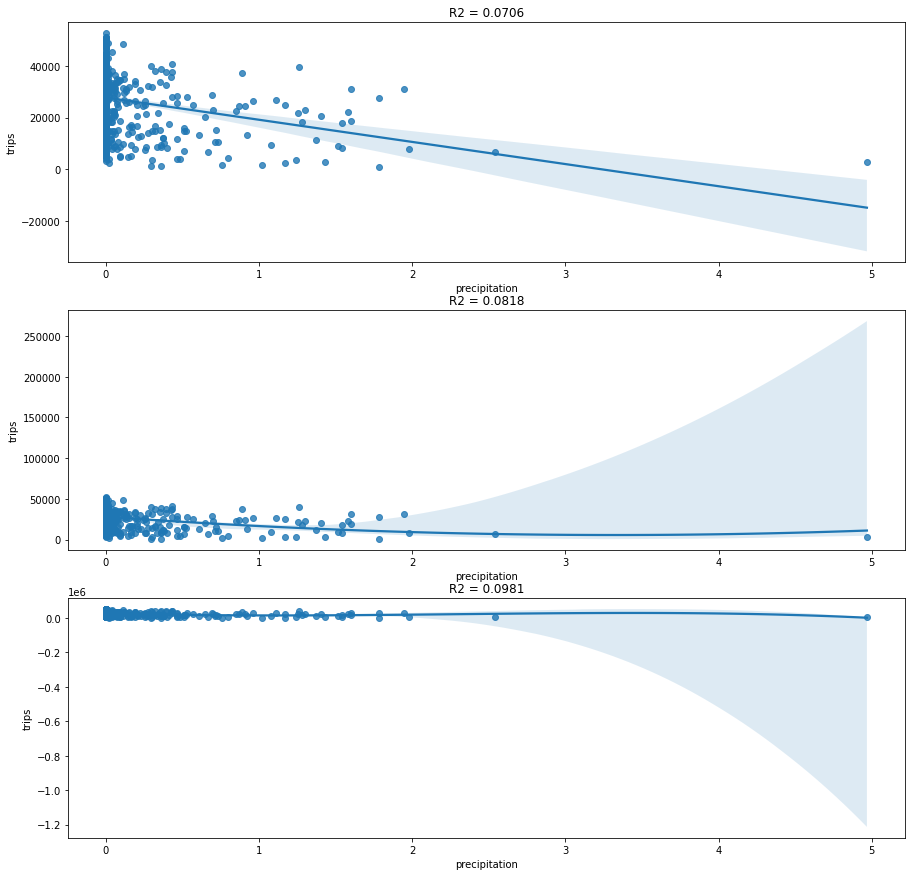

In [88]:
poly_reg('precipitation', 'trips', weekday, 3)
# order=3 is the best, R2=0.0981, but R2 is small, means linear regression model is not good 

--> *Your answer here*  
See the comment on the code

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

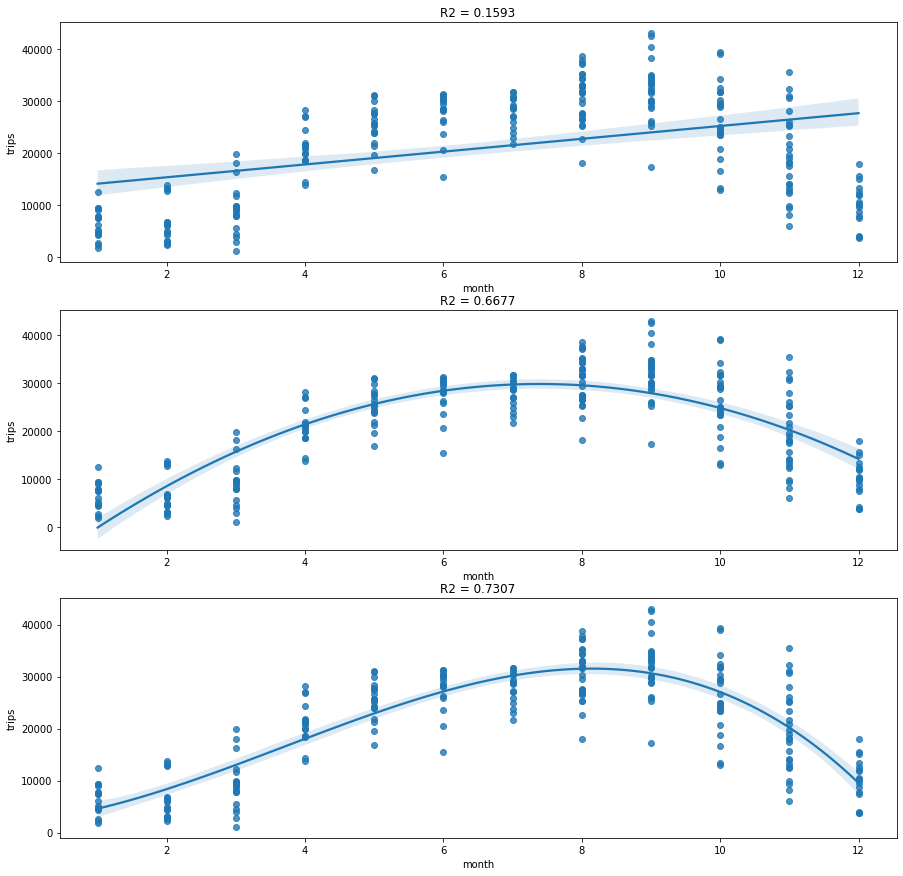

In [92]:
# Your code here
# You can add more cells if you need them
poly_reg('month', 'trips', weekend, 3)
# order=3 is the best, R2=0.7307

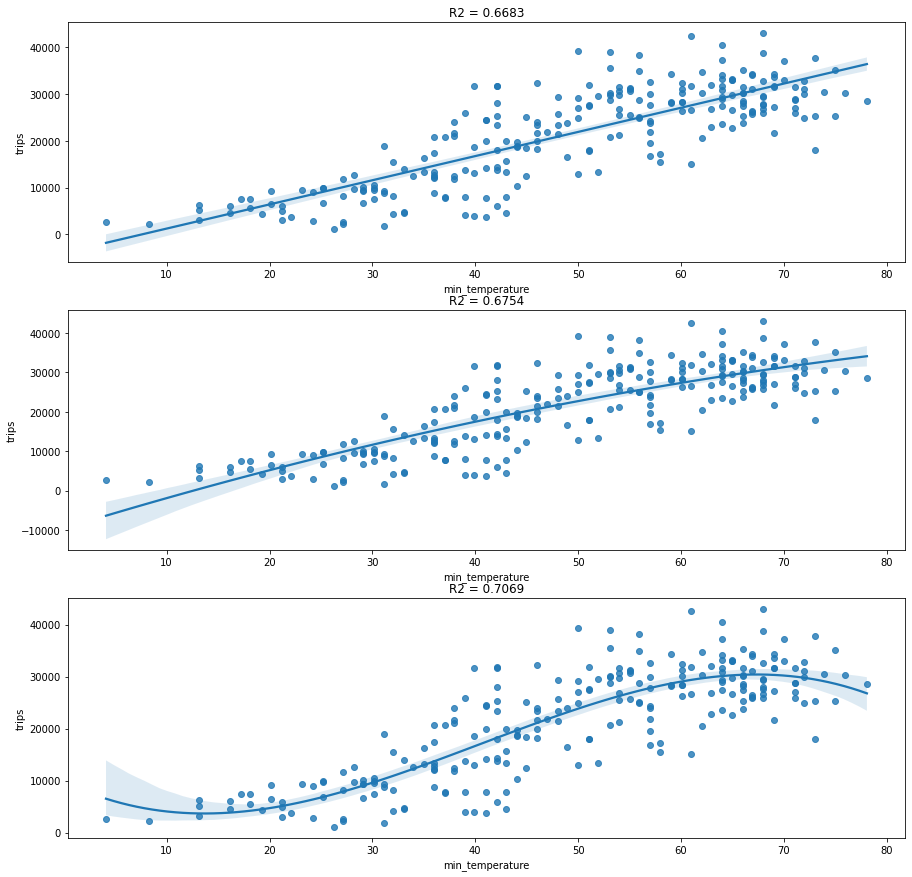

In [94]:
poly_reg('min_temperature', 'trips', weekend, 3)
# order=3 is the best, R2=0.7069

E:\anaconda3\envs\cs506\lib\site-packages\seaborn\algorithms.py:85: RankWarning:

Polyfit may be poorly conditioned

E:\anaconda3\envs\cs506\lib\site-packages\seaborn\algorithms.py:85: RankWarning:

Polyfit may be poorly conditioned



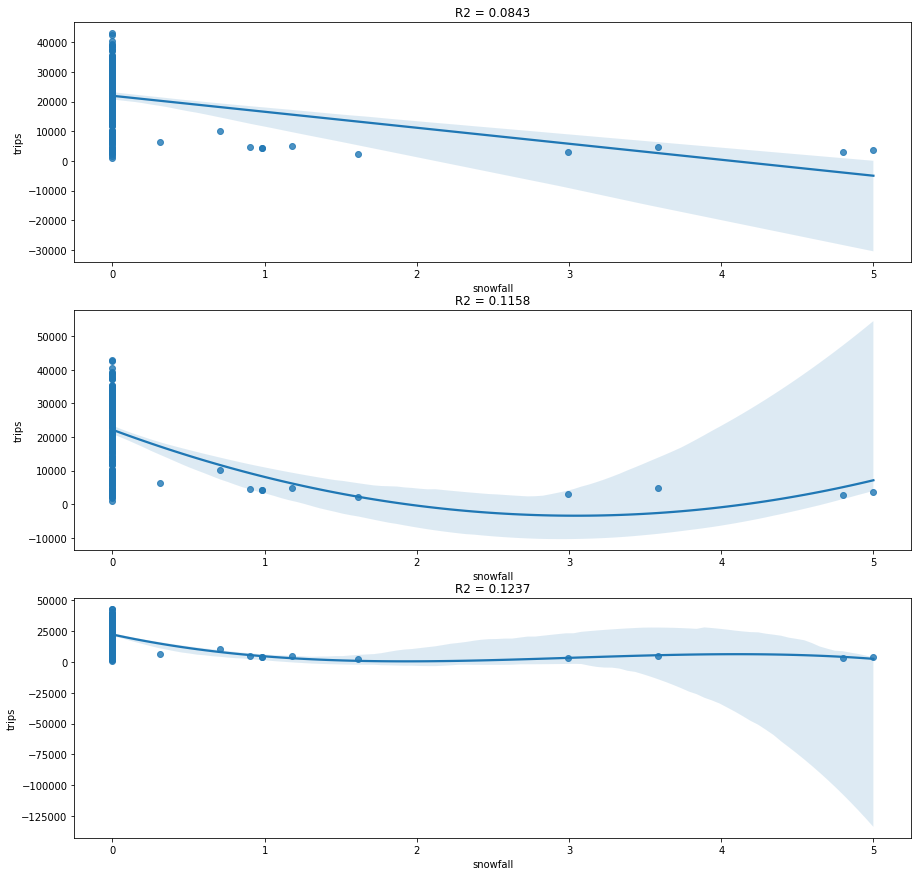

In [98]:
poly_reg('snowfall', 'trips', weekend, 3)
# order=3 is the best, R2=0.1237, but R2 is small, means linear regression model is not good 

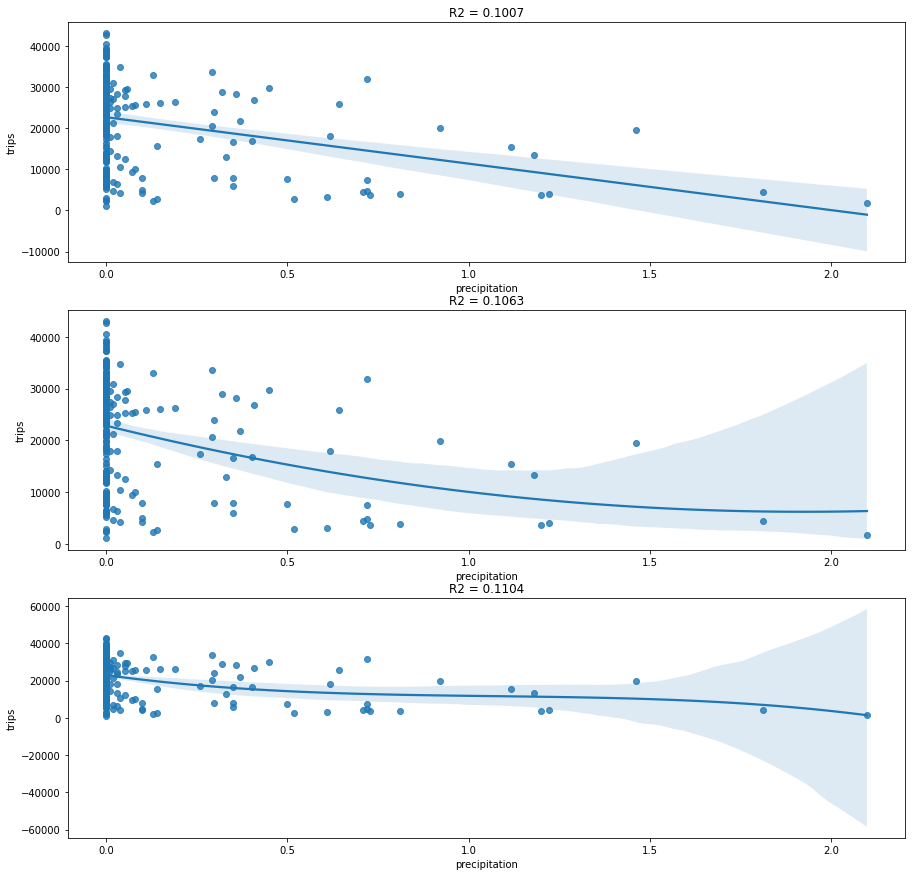

In [101]:
poly_reg('precipitation', 'trips', weekend, 3)
# order=3 is the best, R2=0.1104, but R2 is small, means linear regression model is not good 

--> *Your answer here*  
See the comment on the code